In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

df = pd.read_csv('covid19.csv')
df.head()
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.145000e+03,1.774000e+03,1.137000e+03,1.784000e+03,3.186000e+03,2145.000000,1774.000000,1137.000000,3186.000000
mean,1.393672e+06,1.168188e+06,3.434739e+05,7.205658e+04,5.656643e+04,5.619720,4.874639,1.567845,2191.381984
std,4.577173e+06,3.801181e+06,1.248999e+06,2.033630e+05,1.760802e+05,10.661725,8.134712,4.127922,3709.526743
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.809500e+04,2.561775e+04,7.607000e+03,1.956500e+03,1.287500e+03,0.530000,0.550000,0.110000,351.250000
50%,1.729120e+05,1.563050e+05,2.918800e+04,1.067850e+04,6.257000e+03,2.130000,2.200000,0.620000,996.000000
75%,7.135170e+05,6.106792e+05,1.712700e+05,5.478875e+04,2.868750e+04,4.950000,3.977500,1.270000,1845.000000
max,5.522036e+07,3.967055e+07,1.501543e+07,2.242472e+06,1.916190e+06,78.300000,47.890000,31.050000,30869.000000


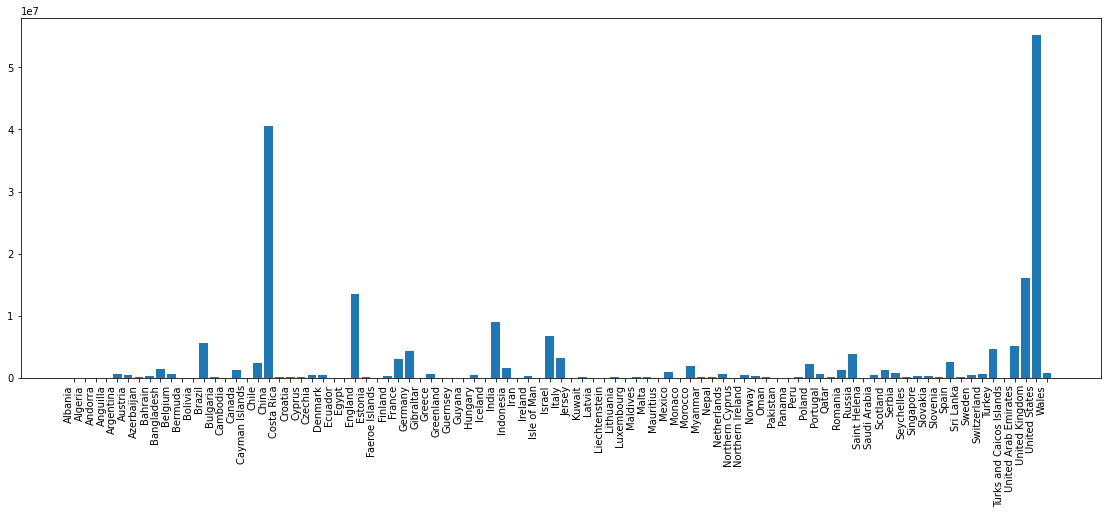

In [45]:
gb_country = df.groupby('country')[['total_vaccinations']].max()

fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])

ax.bar(gb_country.index, gb_country['total_vaccinations'])
fig.autofmt_xdate(rotation=90) 
plt.show()

Text(0.5, 1.0, 'Top 10 most vaccinated countries')

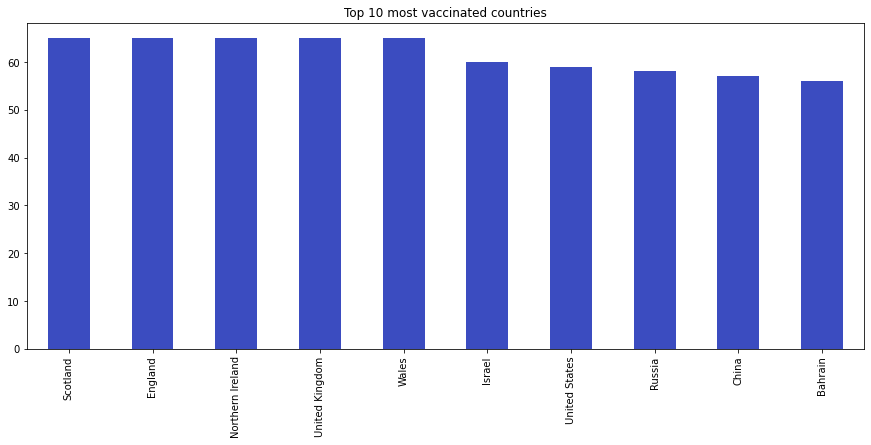

In [42]:
df['country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,6),colormap='coolwarm')
plt.title('Top 10 most vaccinated countries')

Text(0.5, 1.0, 'Top 10 least vaccinated countries')

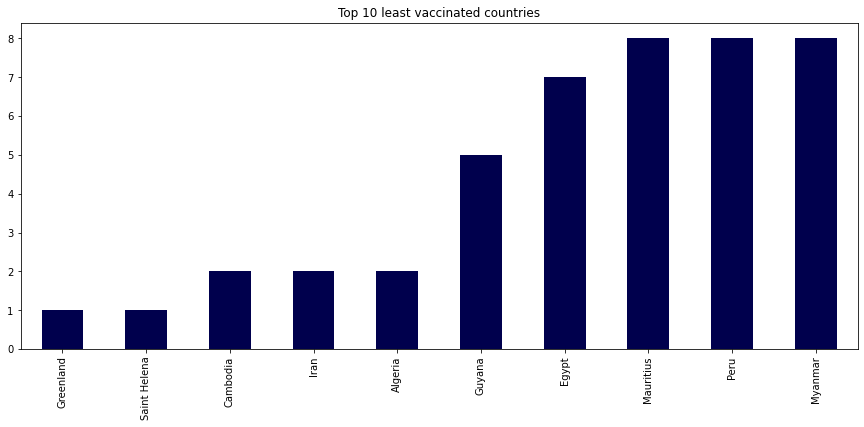

In [15]:
df['country'].value_counts().sort_values(ascending=True).head(10).plot(kind='bar',figsize=(15,6),colormap='seismic')
plt.title('Top 10 least vaccinated countries')

<AxesSubplot:ylabel='country'>

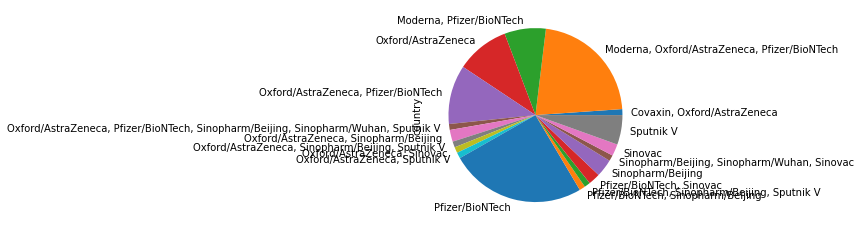

In [22]:
df_vaccines = df.drop_duplicates(subset=['country','vaccines'], keep ='last')
df_vaccines.groupby('vaccines')['country'].count().plot(kind='pie')

Text(0.5, 0, 'Date')

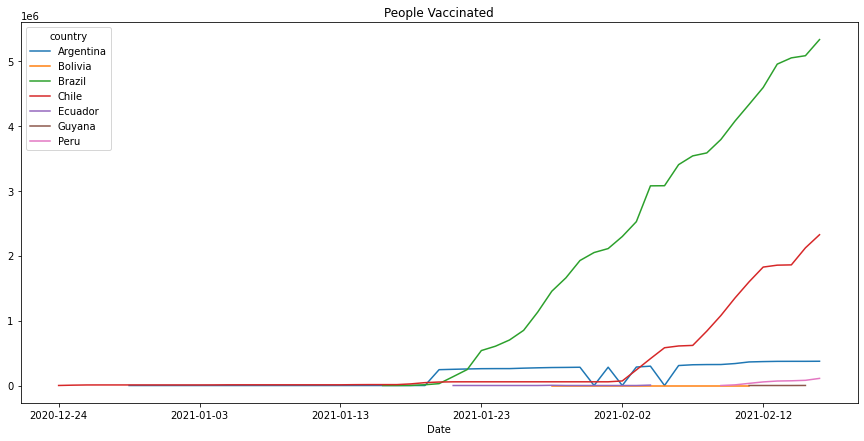

In [25]:
countries_sa = ['Brazil','Argentina','Chile','Venezuela','Bolivia','Colombia','Ecuador','Peru','Paraguay','Uruguay','Suriname','Guyana']
fig,ax = plt.subplots(figsize=(15,7))
south_america_ds = df[df.country.isin(countries_sa)]
south_america_ds.groupby(['date','country']).sum()['people_vaccinated'].unstack().plot(ax=ax)
plt.title('People Vaccinated')
plt.xlabel('Date')

<AxesSubplot:>

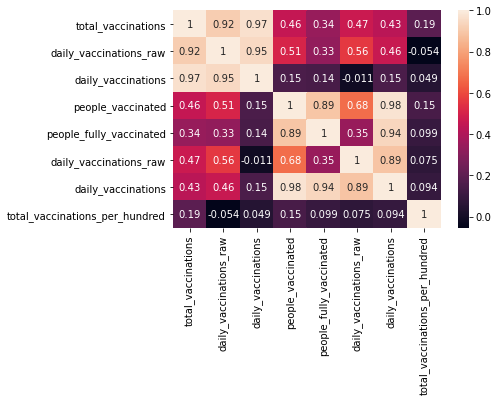

In [32]:
import seaborn as sns

undt=pd.read_csv('covid19.csv')
new_df = df.sort_values('people_vaccinated_per_hundred', ascending=False).drop_duplicates('country').sort_index().reset_index(drop=True)
lists_countries_vaccine = list(new_df['country'])
dfun_new = undt[undt['country'].isin(lists_countries_vaccine)]
dfun_new.reset_index(drop=True, inplace=True)
new_df.reset_index(drop=True, inplace=True)
df3 = pd.concat([dfun_new.iloc[:,3],dfun_new.iloc[:,6:8],dfun_new.iloc[:,31:33],new_df.iloc[:,4:9]], axis = 1)
for x in range(4):
    df3.iloc[:,x] = df3.iloc[:,x].astype(float)
sns.heatmap(df3.corr(), annot= True)

In [50]:
df.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.994298,0.925016,0.915930,0.967453,0.198666,0.205415,0.105679,0.133351
people_vaccinated,0.994298,1.000000,0.879587,0.926011,0.976648,0.191345,0.209374,0.073365,0.134202
people_fully_vaccinated,0.925016,0.879587,1.000000,0.848907,0.874140,0.198173,0.172479,0.219562,0.138819
daily_vaccinations_raw,0.915930,0.926011,0.848907,1.000000,0.947794,0.121487,0.137509,0.039982,0.111706
daily_vaccinations,0.967453,0.976648,0.874140,0.947794,1.000000,0.129673,0.153187,0.052051,0.081196
total_vaccinations_per_hundred,0.198666,0.191345,0.198173,0.121487,0.129673,1.000000,0.975054,0.888975,0.855590
people_vaccinated_per_hundred,0.205415,0.209374,0.172479,0.137509,0.153187,0.975054,1.000000,0.771447,0.882318
people_fully_vaccinated_per_hundred,0.105679,0.073365,0.219562,0.039982,0.052051,0.888975,0.771447,1.000000,0.729675
daily_vaccinations_per_million,0.133351,0.134202,0.138819,0.111706,0.081196,0.855590,0.882318,0.729675,1.000000
